In [3]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
db_data = pd.read_csv('diabetes.csv')
db_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
db_data.shape

(768, 9)

In [6]:
db_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
db_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


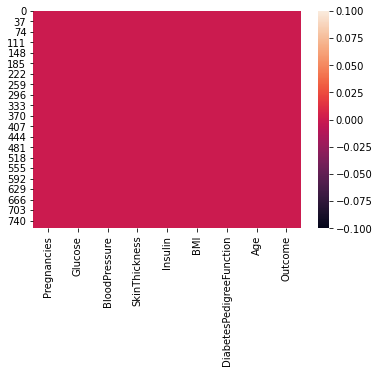

In [8]:
sns.heatmap(db_data.isnull())

In [9]:
db_data.eq(0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
db_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
db_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] =\
 db_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

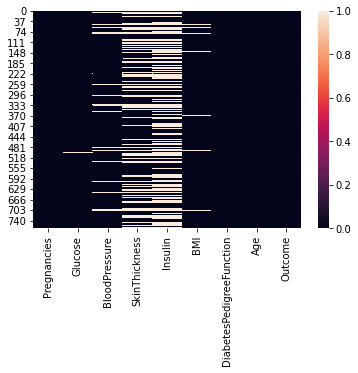

In [12]:
sns.heatmap(db_data.isnull())

In [13]:
db_data.fillna(db_data.mean(),inplace=True) 
db_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [14]:
db_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [15]:
from imblearn.over_sampling import SMOTE
from collections import Counter

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [16]:
db_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


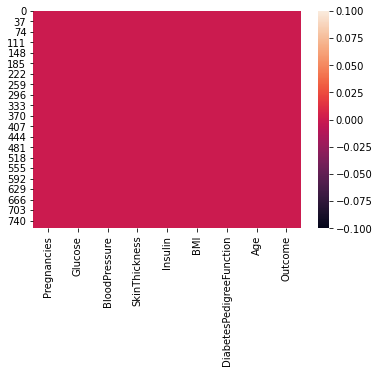

In [17]:
sns.heatmap(db_data.isnull())

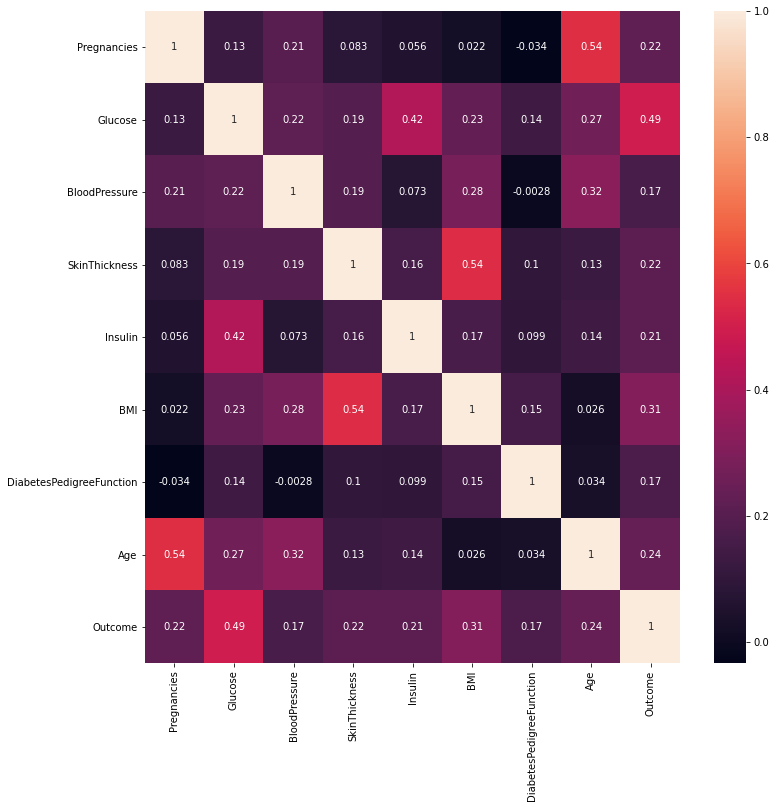

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(db_data.corr(),annot=True)

In [19]:
x=db_data[['Glucose','BMI','Age']]
y=db_data['Outcome']

In [20]:
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [43]:
knn=KNeighborsClassifier(n_neighbors=3)

In [44]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [45]:
predict=knn.predict(x_test)
predict

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1])

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       104
           1       0.76      0.79      0.78        96

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [48]:
from sklearn import metrics

In [49]:
metrics.confusion_matrix(y_test,predict)

array([[80, 24],
       [20, 76]])

In [50]:
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       104
           1       0.76      0.79      0.78        96

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
for i in range(1,20):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
print(i)
print()
print(knn.predict(x_test))
print()
print(classification_report(y_test,knn.predict(x_test)))

19

[0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0
 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1
 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1
 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0]

              precision    recall  f1-score   support

           0       0.77      0.72      0.75       104
           1       0.72      0.77      0.74        96

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.75       200



In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
cross_val_score(knn,x,y,cv=10,scoring='accuracy')

array([0.7 , 0.77, 0.7 , 0.71, 0.8 , 0.81, 0.79, 0.75, 0.74, 0.72])

In [55]:
knnAccuracy=[]

In [65]:
ks=list(range(1,int((9/10)*len(x)),2))


In [57]:
for k in ks:
  testKNN=KNeighborsClassifier(n_neighbors=k)
  score=cross_val_score(testKNN,x,y,cv=10,scoring='accuracy').mean()
  knnAccuracy.append(score)

In [66]:
maxscore=max(knnAccuracy)

In [59]:
ks[knnAccuracy.index(maxscore)]

3

In [60]:
final=KNeighborsClassifier(n_neighbors=3)

In [63]:
final.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')